In [1]:
import numpy as np
import pandas as pd
import h5py
import copy

In [2]:
import h5py

f = h5py.File("train_catvnoncat.h5", "r")

In [3]:
for key in f.keys():
    print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
    print(type(f[key])) # get the object type: usually group or dataset

list_classes
<class 'h5py._hl.dataset.Dataset'>
train_set_x
<class 'h5py._hl.dataset.Dataset'>
train_set_y
<class 'h5py._hl.dataset.Dataset'>


In [4]:
train_set_x_orig=f['train_set_x']
train_set_y=f['train_set_y']

In [5]:
train_set_x_orig.shape,train_set_y.shape

((209, 64, 64, 3), (209,))

In [6]:
f2=h5py.File("test_catvnoncat.h5", "r")

In [7]:
for key in f2.keys():
    print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
#     print(type(f[key])) # get the object type: usually group or dataset

list_classes
test_set_x
test_set_y


In [8]:
test_set_x_orig=f2['test_set_x']
test_set_y=f2['test_set_y']

In [9]:
train_set_x_orig[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [10]:
type(train_set_y[0])

numpy.int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def show_image(index):
    plt.imshow(train_set_x_orig[index])
    if train_set_y[index]==0:
        print("Not a cat")
    else:
        print("Cat")

Not a cat


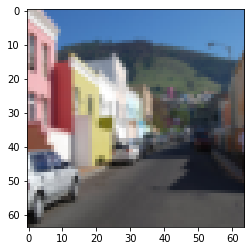

In [13]:
show_image(1)

Cat


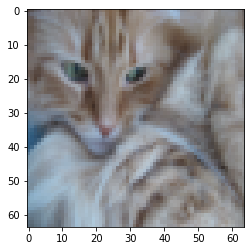

In [14]:
show_image(2)

In [15]:
m_train = train_set_x_orig.shape[0] #Number of training examples
m_test = test_set_x_orig.shape[0] #Number of test examples
num_px = train_set_x_orig.shape[1] #Height/Width of each image

In [16]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


In [17]:
# Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into
# single vectors of shape (num_px  ∗num_px  ∗ 3, 1).
train_set_x_flatten = train_set_x_orig[()].reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig[()].reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (209,)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (50,)


In [18]:
type(train_set_x_orig),type(train_set_x_orig[()]),type(train_set_x_flatten)

(h5py._hl.dataset.Dataset, numpy.ndarray, numpy.ndarray)

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [20]:
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.0
    return w,b

In [21]:
def propagate(w, b, X, Y):
#     w -- weights, a numpy array of size (num_px * num_px * 3, 1)
#     b -- bias, a scalar
#     X -- data of size (num_px * num_px * 3, number of examples)
#     Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    m = X.shape[1]
    
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-1*(np.sum((Y*np.log(A))+((1-Y)*np.log(1-A))))/m
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw=(np.dot(X,(A-Y).T))/m
    db=(np.sum(A-Y))/m
    
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [22]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [23]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [25]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [26]:
logistic_regression_model = model(train_set_x, train_set_y[()], test_set_x, test_set_y[()], num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


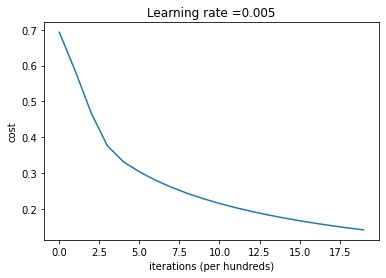

In [27]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

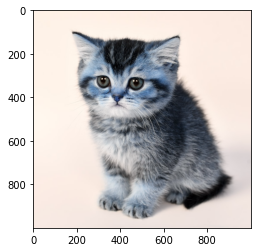

In [28]:
import cv2
my_image = "cat_image.jpeg"
img=cv2.imread(my_image)
plt.imshow(img)

In [29]:
img.shape

(1000, 1000, 3)

In [30]:
new_img=cv2.resize(img,(num_px,num_px))
new_img.shape

(64, 64, 3)

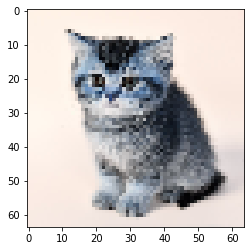

In [31]:
plt.imshow(new_img)

In [32]:
image = new_img / 255.
image = image.reshape((1, num_px * num_px * 3)).T

In [33]:
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
my_predicted_image

array([[1.]])